## Classification of Parkinson patients using tapping and memory

In [1]:
import synapseclient
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt

In [2]:
#Save to a csv file

with open('TappingTableWithPerform&EntropyTap.csv') as csvfile:
    TapTable=pd.read_csv(csvfile, delimiter=',') 
with open('DemoTable.csv') as csvfile:
    DemoTable=pd.read_csv(csvfile, delimiter=',') 
with open('MemoryTable.csv') as csvfile:
    MemTable=pd.read_csv(csvfile, delimiter=',')

In [3]:
# eliminate the tasks where parkinson patients were feeling at their best
print(TapTable.shape)
TapTable=TapTable[TapTable['medTimepoint']!= 'Just after Parkinson medication (at your best)']
TapTable=TapTable[TapTable['medTimepoint']!= 'Another time']

MemTable=MemTable[MemTable['medTimepoint']!= 'Just after Parkinson medication (at your best)']
MemTable=MemTable[MemTable['medTimepoint']!= 'Another time']

#TapTable=TapTable.drop(['ROW_ID', 'ROW_VERSION','recordId','createdOn','appVersion','phoneInfo','accel_tapping.json.items','tapping_results.json.ButtonRectLeft','tapping_results.json.ButtonRectRight','tapping_results.json.endDate','tapping_results.json.startDate','tapping_results.json.TappingViewSize','medTimepoint'], axis=1)
print(TapTable.shape)
print(MemTable.shape)

(69979, 18)
(44413, 18)
(3777, 14)


In [4]:
# Averaging results over patients
TapTableN = TapTable.groupby("healthCode")["TapPerform","EntropyTap"].mean()
TapTableN = pd.DataFrame(TapTableN)  
TapTableN = TapTableN.reset_index()
print(TapTableN.head())


                             healthCode  TapPerform  EntropyTap
0  000240d1-1110-4dd2-a2d0-e344c37efd68       210.0    3.443919
1  0002d5ff-53da-44bb-ab0d-f2426a8c78e2       104.0    2.753290
2  0005a31d-e52c-447c-9971-ccc7bef667fb       180.0    2.898457
3  00081bd9-9abd-4003-b035-de6cc3e8c922        38.5    4.092585
4  00290381-e82e-46b2-b4e6-df115823d71b       193.0    3.422479


In [5]:
MemTable.columns
MemTable=MemTable.drop(['ROW_ID', 'ROW_VERSION','recordId','createdOn','appVersion','phoneInfo','MemoryGameResults.json.startDate','MemoryGameResults.json.endDate','MemoryGameResults.json.MemoryGameGameRecords','medTimepoint'], axis=1)
MemTableN = MemTable.groupby("healthCode")["MemoryGameResults.json.MemoryGameOverallScore"].mean()
MemTableN = pd.DataFrame(MemTableN)  
MemTableN = MemTableN.reset_index()
print(MemTableN.head())


                             healthCode  \
0  00081bd9-9abd-4003-b035-de6cc3e8c922   
1  010aed99-c9b3-4bdc-a23b-530d619b43a9   
2  01185d64-7791-4282-8c3d-e657cd810bb0   
3  0142010e-cb15-4391-90b5-29ac0dbe5bae   
4  0160664a-f4af-4071-a4aa-2967f3ea0503   

   MemoryGameResults.json.MemoryGameOverallScore  
0                                         210.00  
1                                         255.00  
2                                         215.00  
3                                         257.50  
4                                         251.25  


In [6]:
print(MemTableN.shape)

(823, 2)


In [7]:

#Sub-DataFrame of Demo Table with only features of interest: Age, diagnostic year, gender.
#DemoTable.head()
DemoTableN=DemoTable[["age","healthCode","diagnosis-year","gender"]]
DemoTableN.shape
#Merges TapTables with the PerfInfo and drops thos values in TapTable that are not defined in PerInfo
TapTableN=TapTableN.merge(DemoTableN)
TapTableN.shape
#TapMemTableN=pd.concat([TapTableN, MemTableN], axis=1)
#TapMemTableN
#TapMemTableN.head()
#TapTable.head()
#PatientTemp = TapTable.groupby("healthCode")["healthCode"].count()
#print(PatientTemp)
#TapMemTableN=TapMemTableN.merge(DemoTableN)
#TapMemTableN.head()


(6013, 6)

In [8]:
TapMemTableN=TapTableN.merge(MemTableN)
print(TapMemTableN)

                               healthCode  TapPerform  EntropyTap   age  \
0    00081bd9-9abd-4003-b035-de6cc3e8c922   38.500000    4.092585  70.0   
1    010aed99-c9b3-4bdc-a23b-530d619b43a9  201.500000    3.482837  46.0   
2    0142010e-cb15-4391-90b5-29ac0dbe5bae  200.000000    3.204262  37.0   
3    0160664a-f4af-4071-a4aa-2967f3ea0503  136.896552    3.338570  64.0   
4    01b25cac-97dc-4f16-b266-742a25a768d0   79.357143    3.170084  67.0   
..                                    ...         ...         ...   ...   
641  ff5abff8-7ece-4735-b568-4f4d361f1841  240.500000    3.008788  36.0   
642  ff699dbc-26d4-4dae-8c34-d0fb7b96ae21  141.000000    3.471341  41.0   
643  ff776fbd-45ad-491b-ba6d-67a74f62c434  162.000000    3.863474  18.0   
644  ffab2631-dfe1-4f5e-bd9e-f763e8aede19  185.643678    2.979239  56.0   
645  ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3  166.000000    3.619195  61.0   

     diagnosis-year  gender  MemoryGameResults.json.MemoryGameOverallScore  
0               NaN   

In [9]:
TapMemTableN=TapMemTableN.dropna(subset=['age','gender','MemoryGameResults.json.MemoryGameOverallScore'])

In [10]:
# change gender column to categorical 0:female, 1: male
df_gender = pd.get_dummies(TapMemTableN['gender'],drop_first=True)
#print(TapTableN.gender.value_counts())
TapMemTableN = pd.concat([TapMemTableN, df_gender], axis=1)
TapMemTableN=TapMemTableN.drop(['healthCode','gender'], axis=1)



In [11]:
TapMemTableN.head()


,TapPerform,EntropyTap,age,diagnosis-year,MemoryGameResults.json.MemoryGameOverallScore,Male
0,38.500000,4.092585,70.0,NaN,210.0000,1
1,201.500000,3.482837,46.0,NaN,255.0000,1
2,200.000000,3.204262,37.0,NaN,257.5000,1
3,136.896552,3.338570,64.0,2012.0,251.2500,1
4,79.357143,3.170084,67.0,NaN,237.1875,1


In [12]:
# diagnosis-year becomes years with diagnosed disease
TapMemTableN['diagnosis-year']=(2015-TapMemTableN['diagnosis-year'])
#NAN REPLACED WITH ZERO AND OTHER INT REPLACED WITH ONE
dfb = TapMemTableN['diagnosis-year'].notnull().astype(int)
TapMemTableN['YearsPD']=dfb
print(TapMemTableN)


     TapPerform  EntropyTap   age  diagnosis-year  \
0     38.500000    4.092585  70.0             NaN   
1    201.500000    3.482837  46.0             NaN   
2    200.000000    3.204262  37.0             NaN   
3    136.896552    3.338570  64.0             3.0   
4     79.357143    3.170084  67.0             NaN   
..          ...         ...   ...             ...   
641  240.500000    3.008788  36.0             NaN   
642  141.000000    3.471341  41.0             NaN   
643  162.000000    3.863474  18.0             NaN   
644  185.643678    2.979239  56.0             6.0   
645  166.000000    3.619195  61.0             5.0   

     MemoryGameResults.json.MemoryGameOverallScore  Male  YearsPD  
0                                       210.000000     1        0  
1                                       255.000000     1        0  
2                                       257.500000     1        0  
3                                       251.250000     1        1  
4                      

In [13]:
TapMemTableN.columns

Index(['TapPerform', 'EntropyTap', 'age', 'diagnosis-year',
       'MemoryGameResults.json.MemoryGameOverallScore', 'Male', 'YearsPD'],
      dtype='object')

In [44]:
X = TapMemTableN[['TapPerform','EntropyTap', 'age','Male','MemoryGameResults.json.MemoryGameOverallScore']]
#X = TapMemTableN[['EntropyTap', 'age','Male','MemoryGameResults.json.MemoryGameOverallScore']]
y = TapMemTableN['YearsPD']
sum(y)

173

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

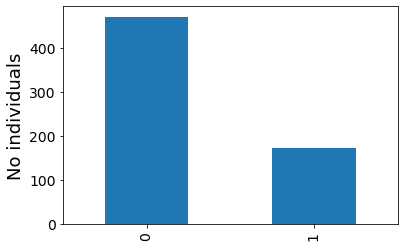

In [45]:
PDPlot=y.value_counts().plot.bar()
PDPlot.set_ylabel('No individuals',fontsize=18)
#PDPlot.set_title('Audit Results')
PDPlot.set_xticklabels( ('0', '1'),fontsize=14 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Building the model

In [67]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=130)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
classifiers = [LogisticRegression(random_state=13), 
               GaussianNB(), 
               RandomForestClassifier(random_state=13),
              svm.SVC(kernel='poly',probability=True,random_state=12)]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

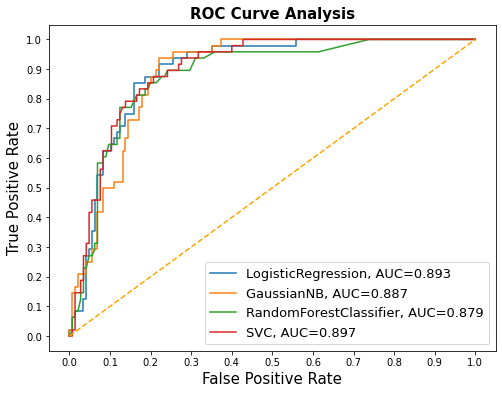

In [70]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [50]:
#Notes on the Report:
#Precision 0: TN/(TN+FN) of those predicted with out the disease, which how many really do not have it.
#Precision 1: TP/(TP+FP) of those predicted with the disease, which how many really had it.
#Recall 0: TN/(TN+FP) of those that dont have the disease how many were predicted with out the disease
#Recall 1: TP/(TP+FN) of those that have the disease how many were predicted with the disease
#Accuracy: TP+TN/(TP+TN+FP+FN), how many were classified correctly.
#For early diagnosis we would like to focus on recall 1 to be high. People with early stages of the disease should diagnose
#Few false negatives.

## Using weighted logistic regression to compensate for imbalance data set


In [71]:
# define weight hyperparameter
w = [{0:1,1:1},{0:1,1:2},{0:1,1:3}, {0:1,1:4}, 
     {0:1,1:5}, {0:1,1:6}, {0:1,1:7}, {0:1,1:8}, 
     {0:1,1:9}, {0:1,1:10}, {0:1,1:12}, {0:1,1:14}, 
     {0:1,1:16}, {0:1,1:18}, {0:1,1:20}, 
     {0:1,1:25}, {0:1,1:30}, {0:1.0,1:40}, 
     {0:1.0,1:50}, {0:1,1:100}]
hyperparam_grid = {"class_weight": w }

from sklearn import datasets
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=15)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

# define model
lg3 = LogisticRegression(random_state=3)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=None, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)


print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

print(grid.cv_results_['mean_test_score'])

Best score: 0.9112615384615385 with param: {'class_weight': {0: 1, 1: 2}}
[0.91064615 0.91126154 0.91101538 0.90990769 0.91015385 0.91101538
 0.91076923 0.91064615 0.91027692 0.91064615 0.90941538 0.90892308
 0.90781538 0.90572308 0.90449231 0.90264615 0.90141538 0.8992
 0.89723077 0.89341538]


Accuracy of logistic regression classifier on test set: 0.83
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       145
           1       0.62      0.85      0.72        48

    accuracy                           0.83       193
   macro avg       0.78      0.84      0.80       193
weighted avg       0.86      0.83      0.84       193



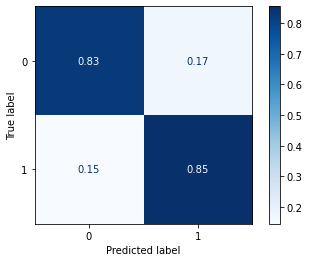

In [72]:

from sklearn.metrics import roc_curve, roc_auc_score

### define class weights grdisearch showed this is the best weighted class

w = {0: 1.0, 1:2} #obtein from last cell

classTapMem = LogisticRegression(class_weight=w)
classTapMem.fit(X_train, y_train) 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

y_pred = classTapMem.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classTapMem.score(X_test, y_test)))
confusionMatrix = confusion_matrix(y_test, y_pred, normalize='true')
print(classification_report(y_test, y_pred))
classes = ["unoccupied", "occupied"]
disp = plot_confusion_matrix(classTapMem, X_test, y_test,cmap=plt.cm.Blues,normalize='true')

In [73]:
#'TapPerform','EntropyTap', 'age','Male','MemoryGameResults.json.MemoryGameOverallScore'
print(classTapMem.coef_,classTapMem.intercept_)

[[-0.01208138  0.27504691  0.11129517 -0.69095245 -0.00089996]] [-4.30041844]


In [74]:

(classTapMem.predict([[200,3,60,1,400]]))


array([0])

Best predictor is gender!

<AxesSubplot:xlabel='age', ylabel='TapPerform'>

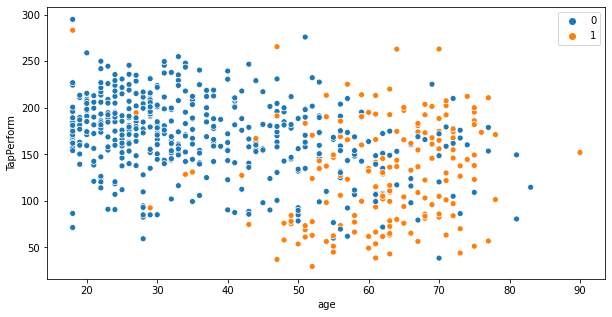

In [75]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(data = TapMemTableN, 
                x = 'age', 
                y = 'TapPerform', 
                hue = TapMemTableN['YearsPD'].tolist())

Checking what is the age of the false negatives

In [78]:
P = X_test.loc[(y_test == 1)]
PP = X_test.loc[(y_pred == 0)]

In [80]:
print(P.index)
print(PP.index)

Int64Index([524, 466, 170, 449,  82, 276, 164, 260, 285, 498, 522, 190, 151,
            445, 431, 356, 185, 277, 308, 381, 621, 119, 528, 254, 134, 275,
            509, 102, 280, 612, 299, 266, 230,  13, 457, 369, 517, 229, 373,
            284, 328, 603,  15, 237, 159, 188, 116, 521,  72, 242, 491,  24,
             64, 550],
           dtype='int64')
Int64Index([268, 399, 624, 384, 452,  79, 584, 461, 404,  11,
            ...
            403, 352,  74, 491, 479, 353, 243, 510, 250, 593],
           dtype='int64', length=132)


In [81]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [82]:
print(intersection(P.index, PP.index)) 


[285, 498, 254, 509, 266, 229, 328, 15, 521, 72, 491]


In [97]:
X_test.loc[intersection(P.index, PP.index),'age']



285    59.0
498    59.0
254    51.0
509    43.0
266    54.0
229    63.0
328    44.0
15     53.0
521    65.0
72     63.0
491    27.0
Name: age, dtype: float64

In [98]:
X_test.loc[intersection(P.index, PP.index),'TapPerform']

285    214.000000
498    190.575758
254     69.000000
509     74.666667
266    190.347826
229    220.075000
328    167.034483
15     143.009259
521    200.362319
72     192.666667
491    194.750000
Name: TapPerform, dtype: float64

 The idea of only using age >40 to make the classfier won't decrease false negatives

## What if only Tapping performance was included in the logistic regression


In [117]:
TapTableN.head()

,healthCode,TapPerform,age,diagnosis-year,gender
0,000240d1-1110-4dd2-a2d0-e344c37efd68,210.000000,33.0,NaN,Male
1,0005a31d-e52c-447c-9971-ccc7bef667fb,180.000000,35.0,NaN,Male
2,00081bd9-9abd-4003-b035-de6cc3e8c922,38.500000,70.0,NaN,Male
3,00290381-e82e-46b2-b4e6-df115823d71b,193.000000,25.0,NaN,Male
4,00372eda-3796-481b-96f7-f37e8e600904,129.166667,NaN,NaN,Female


In [76]:
# diagnosis-year becomes years with diagnosed disease
TapTableN['diagnosis-year']=(2015-TapTableN['diagnosis-year'])
#NAN REPLACED WITH ZERO AND OTHER INT REPLACED WITH ONE
dfbb = TapTableN['diagnosis-year'].notnull().astype(int)
TapTableN['YearsPD']=dfbb
print(TapMemTableN)

     TapPerform  EntropyTap   age  diagnosis-year  \
0     38.500000    4.092585  70.0             NaN   
1    201.500000    3.482837  46.0             NaN   
2    200.000000    3.204262  37.0             NaN   
3    136.896552    3.338570  64.0             3.0   
4     79.357143    3.170084  67.0             NaN   
..          ...         ...   ...             ...   
641  240.500000    3.008788  36.0             NaN   
642  141.000000    3.471341  41.0             NaN   
643  162.000000    3.863474  18.0             NaN   
644  185.643678    2.979239  56.0             6.0   
645  166.000000    3.619195  61.0             5.0   

     MemoryGameResults.json.MemoryGameOverallScore  Male  YearsPD  
0                                       210.000000     1        0  
1                                       255.000000     1        0  
2                                       257.500000     1        0  
3                                       251.250000     1        1  
4                      

In [77]:
XX = TapTableN[['TapPerform']]
yy = TapTableN['YearsPD']


In [78]:
XX.head()

,TapPerform
0,210.000000
1,180.000000
2,38.500000
3,193.000000
4,129.166667


In [79]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(XX,yy, test_size=0.3, random_state=130)

classTap = LogisticRegression(class_weight=w)
classTap.fit(X_trainT, y_trainT) 


LogisticRegression(class_weight={0: 1.0, 1: 2})

Accuracy of logistic regression classifier on test set: 0.88
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1579
           1       0.52      0.38      0.44       225

    accuracy                           0.88      1804
   macro avg       0.72      0.67      0.69      1804
weighted avg       0.87      0.88      0.87      1804



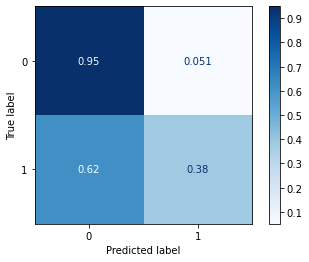

In [80]:
y_predT = classTap.predict(X_testT)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classTap.score(X_testT, y_testT)))
confusionMatrix = confusion_matrix(y_testT, y_predT, normalize='true')
print(classification_report(y_testT, y_predT))
classes = ["unoccupied", "occupied"]
disp = plot_confusion_matrix(classTap, X_testT, y_testT,cmap=plt.cm.Blues,normalize='true')

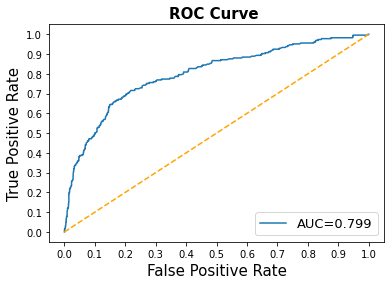

In [89]:
import matplotlib.pyplot as plt
import numpy as np
yprobaT = classTap.predict_proba(X_testT)[::,1]
    
fpr, tpr, _ = roc_curve(y_testT,  yprobaT)
auc = roc_auc_score(y_testT, yprobaT)
plt.plot(fpr, tpr,label="AUC={:.3f}".format(auc))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve ', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')


In [84]:
auc

0.7989289986630075

In [88]:
print("AUC={:.3f}".format(auc))

AUC=0.799
